In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
data.head(5)

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
data.columns

Index(['Cultivator', 'Alchol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash',
       'Magnesium', 'Total_phenols', 'Falvanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [21]:
data.shape

(178, 14)

In [22]:
data.isnull().sum().transpose()

Cultivator              0
Alchol                  0
Malic_Acid              0
Ash                     0
Alcalinity_of_Ash       0
Magnesium               0
Total_phenols           0
Falvanoids              0
Nonflavanoid_phenols    0
Proanthocyanins         0
Color_intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [23]:
data.describe()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


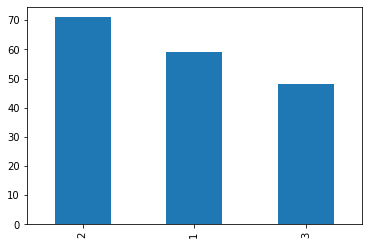

In [24]:
data.Cultivator.value_counts().plot(kind="bar")

In [25]:
train,test = train_test_split(data,test_size = 0.3,random_state=42)
trainX = train.drop(["Cultivator"],axis=1)
trainY = train["Cultivator"]
testX = test.drop(["Cultivator"],axis=1)
testY = test["Cultivator"]

In [26]:
from sklearn.preprocessing import StandardScaler
Stdscaler = StandardScaler()
Stdscaler.fit(trainX)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
trainX = Stdscaler.transform(trainX)
testX = Stdscaler.transform(testX)

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlpclassifier = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

In [30]:
mlpclassifier.fit(trainX,trainY)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [31]:
mlpclassifier_predictions = mlpclassifier.predict(testX)

In [55]:
mlpclassifier.predict_proba(trainX)

array([[5.46486350e-04, 1.59230370e-02, 9.83530477e-01],
       [6.30976981e-05, 9.99846367e-01, 9.05349576e-05],
       [3.30584083e-03, 9.96501918e-01, 1.92240899e-04],
       [9.93236434e-01, 5.74419895e-03, 1.01936746e-03],
       [1.46570193e-04, 9.99725815e-01, 1.27614521e-04],
       [9.95483727e-01, 4.21463762e-03, 3.01635478e-04],
       [5.90089493e-05, 4.92816134e-04, 9.99448175e-01],
       [2.18406741e-05, 9.99956829e-01, 2.13303850e-05],
       [4.93918296e-07, 9.99999259e-01, 2.46740591e-07],
       [9.57624416e-06, 1.08948156e-04, 9.99881476e-01],
       [9.95716257e-01, 3.47868505e-03, 8.05057663e-04],
       [9.98781681e-01, 1.08226558e-03, 1.36053205e-04],
       [9.75852790e-01, 1.88511945e-02, 5.29601540e-03],
       [4.87408486e-05, 2.92455528e-04, 9.99658804e-01],
       [9.70097174e-01, 2.40336797e-02, 5.86914620e-03],
       [9.85250652e-01, 1.33742787e-02, 1.37506964e-03],
       [4.83342875e-04, 9.99496043e-01, 2.06141920e-05],
       [2.04100656e-04, 3.71107

In [56]:
mlpclassifier.predict_log_proba(trainX)

array([[-7.51200123e+00, -4.13998835e+00, -1.66066537e-02],
       [-9.67082627e+00, -1.53644458e-04, -9.30977451e+00],
       [-5.71206443e+00, -3.50421432e-03, -8.55676129e+00],
       [-6.78654299e-03, -5.15956481e+00, -6.88857299e+00],
       [-8.82800611e+00, -2.74222309e-04, -8.96649639e+00],
       [-4.52650227e-03, -5.46919166e+00, -8.10629130e+00],
       [-9.73782144e+00, -7.61537441e+00, -5.51977395e-04],
       [-1.07317365e+01, -4.31719910e-05, -1.07553780e+01],
       [-1.45208957e+01, -7.40659162e-07, -1.52149283e+01],
       [-1.15562251e+01, -9.12463843e+00, -1.18531424e-04],
       [-4.29294423e-03, -5.66110092e+00, -7.12459665e+00],
       [-1.21906154e-03, -6.82869867e+00, -8.90246454e+00],
       [-2.44435337e-02, -3.97117900e+00, -5.24080055e+00],
       [-9.92899310e+00, -8.13719794e+00, -3.41254597e-04],
       [-3.03590330e-02, -3.72829911e+00, -5.13804611e+00],
       [-1.48592015e-02, -4.31442192e+00, -6.58925090e+00],
       [-7.63478427e+00, -5.04084096e-04

In [53]:
mlpclassifier.score(testX, testY)

1.0

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(testY,mlpclassifier_predictions))

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [36]:
print(classification_report(testY,mlpclassifier_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [43]:
mlpclassifier.n_layers_

5

In [48]:
mlpclassifier.n_iter_

324

In [47]:
mlpclassifier.n_outputs_

3

In [46]:
mlpclassifier.out_activation_

'softmax'

In [45]:
mlpclassifier.loss_

0.008743398794926988

In [50]:
mlpclassifier.classes_

array([1, 2, 3])

In [51]:
mlpclassifier.intercepts_

[array([ 0.1983693 , -0.31437802,  0.37169674, -0.1036868 , -0.53210766,
         0.22247998, -0.1041899 ,  0.36119639, -0.38611998, -0.19241261,
        -0.13354454,  0.0622456 , -0.14765966]),
 array([ 0.50664944,  0.5506984 , -0.24419455, -0.24928567,  0.13063001,
         0.38361277,  0.25818745, -0.17334386, -0.28351195,  0.0289654 ,
        -0.05117295,  0.33285475, -0.18047009]),
 array([ 0.24362184, -0.16667298, -0.08082382,  0.25241594, -0.29333986,
        -0.04999527, -0.46027942,  0.38779635,  0.13206037,  0.08075503,
        -0.26478002,  0.36536503,  0.32839639]),
 array([ 0.69875766, -0.54965443, -0.63371063])]

In [52]:
mlpclassifier.coefs_

[array([[ 0.50275169, -0.27938372,  0.00099774,  0.69500757, -0.03554433,
         -0.4788337 , -0.20985191,  0.14906867, -0.50024388,  0.26206357,
         -0.62533878, -0.10137284,  0.17781822],
        [ 0.23168423, -0.15671375, -0.19462445, -0.41915608, -0.12185557,
         -0.00400303, -0.01088052, -0.46066624, -0.11431578,  0.06766268,
         -0.26489395,  0.44593478, -0.43673726],
        [-0.30044845, -0.51388765, -0.17280907,  0.28469812, -0.14183667,
         -0.28608962,  0.26168472,  0.22259841,  0.08718226,  0.25574302,
         -0.10471576,  0.53005988, -0.47049183],
        [ 0.32600822, -0.18113876,  0.44110709, -0.23971287, -0.05387622,
          0.43064409, -0.00429683, -0.25629623,  0.51178898, -0.17674492,
         -0.31088389, -0.3478294 ,  0.52560918],
        [ 0.05138818, -0.28239443,  0.0923791 , -0.01109125,  0.2224134 ,
          0.19378411,  0.30030055,  0.15185778, -0.22336347, -0.14568773,
          0.08238   ,  0.12442269,  0.21566181],
        [ 0.222

In [37]:
error_mlp_test = pd.Series(mlpclassifier_predictions) - testY.reset_index(drop=True)
error_mlp_test.describe()

count    54.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


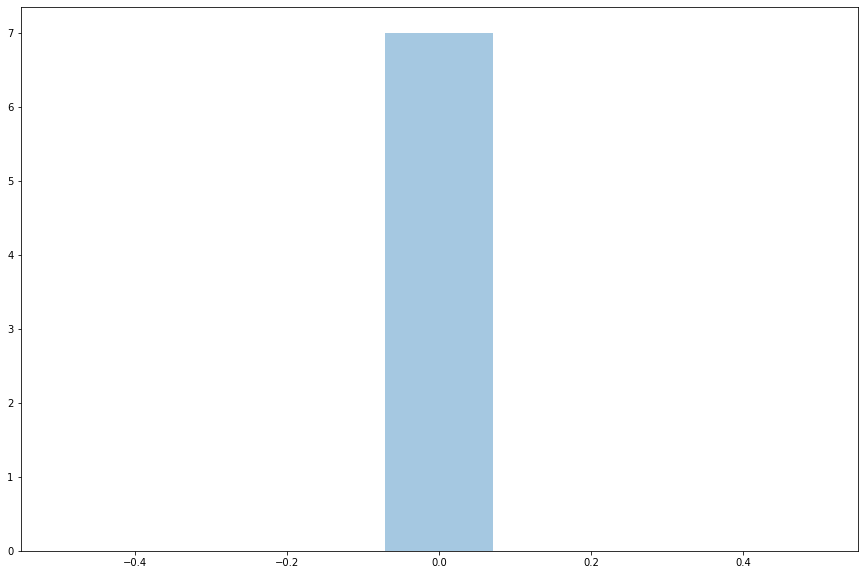

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(error_mlp_test)

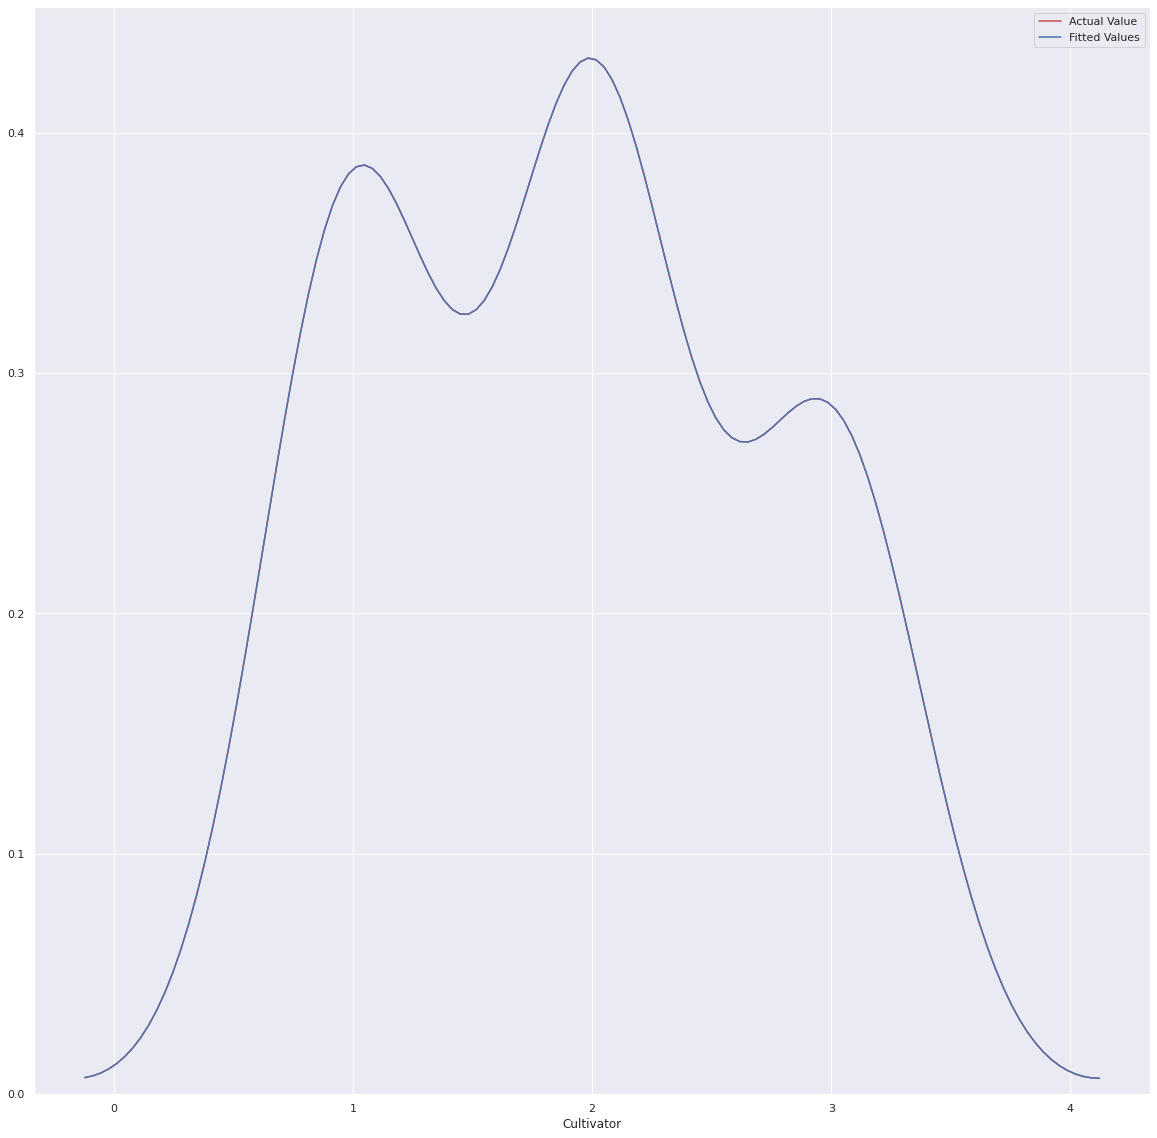

In [42]:
##plt.figure(figsize=(15,15))
sns.set(rc={'figure.figsize':(20,20)})
ax1 = sns.distplot(testY, hist=False, color="r", label="Actual Value")
sns.distplot(mlpclassifier_predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)